In [2]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\mrg18\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Load dataset
df = pd.read_csv('house_data.csv')
print(df)

       build_year        lat  living_area      long    municipality_name  \
0            1990  47.009808        110.0  8.483789              Vitznau   
1            2017  46.872177        120.0  9.880183     Klosters-Serneus   
2            2010  46.519173        107.0  6.525882          Préverenges   
3            2018  47.521343        103.0  8.536971               Bülach   
4            2007  46.510216         95.0  9.852427  Celerina/Schlarigna   
...           ...        ...          ...       ...                  ...   
22565        2017  47.263515        174.0  8.184093         Reinach (AG)   
22566        2018  47.320694        146.0  8.152993           Dürrenäsch   
22567        1972  46.784409         65.0  9.537591           Churwalden   
22568        1977  46.220421         93.0  6.106879              Vernier   
22569        2016  47.022270        142.0  8.310607                 Horw   

       zipcode  num_rooms object_type_name      price  water_percentage_1000  \
0      

In [5]:
numeric_features = df.select_dtypes(include=[np.number])
df = df.fillna(numeric_features.mean())
corr = numeric_features.corr()
print(corr)

                                          build_year       lat  living_area  \
build_year                                  1.000000  0.005994    -0.111503   
lat                                         0.005994  1.000000     0.062597   
living_area                                -0.111503  0.062597     1.000000   
long                                        0.010840  0.202205    -0.054347   
zipcode                                     0.017888  0.403473    -0.026907   
num_rooms                                  -0.167394  0.097611     0.460905   
price                                       0.048022 -0.018581     0.387926   
water_percentage_1000                       0.008341 -0.128262    -0.016316   
travel_time_private_transport              -0.042181 -0.316216    -0.062683   
travel_time_public_transport               -0.041663 -0.325858    -0.044663   
number_of_buildings_in_hectare             -0.082315  0.149011    -0.013060   
number_of_apartments_in_hectare            -0.013794

In [6]:
# Check for non-numeric columns (excluding the target variable 'price')
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: ['municipality_name', 'object_type_name']


In [7]:
# Convert categorical columns to numerical using one-hot encoding
if non_numeric_columns:
    df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Ensure 'price' column exists
if 'price' not in df.columns:
    raise KeyError("The dataset does not contain a 'price' column. Please check the CSV file.")

In [8]:
# Define features (X) and target (y)
X = df.drop(columns=['price'])  # Features (all except target)
y = df['price']  # Target variable

# Ensure all feature columns are numeric
if not np.issubdtype(X.dtypes.values[0], np.number):
    raise ValueError("Some features are still non-numeric. Check the dataset preprocessing.")

In [9]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train = X_train.astype('float32')  # Use float32 instead of float64
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [16]:
#Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')

Model Evaluation:
MSE: 230429999104.00, R-squared: 0.21


In [21]:
df = pd.read_csv('salary_data.csv')
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [22]:
df.dropna(inplace=True)

In [24]:
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [25]:
# Apply one-hot encoding only if columns exist
if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

In [36]:
# Define features and target variable
if 'Salary' in df.columns:
    X = df.drop(columns=['Salary'])
    y = df['Salary']

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse}, R-squared: {r2}')

    # Example prediction
    sample_input = X_test.iloc[[0]] # Keep feature names
    predicted_salary = model.predict(sample_input)
    
    print(f'Predicted Salary for sample input: {predicted_salary[0]}')
else:
    print("Error: The 'Salary' column is missing from the dataset.")

MSE: 49830096.85590839, R-squared: 0.9024461774180497
Predicted Salary for sample input: 115790.21011287419


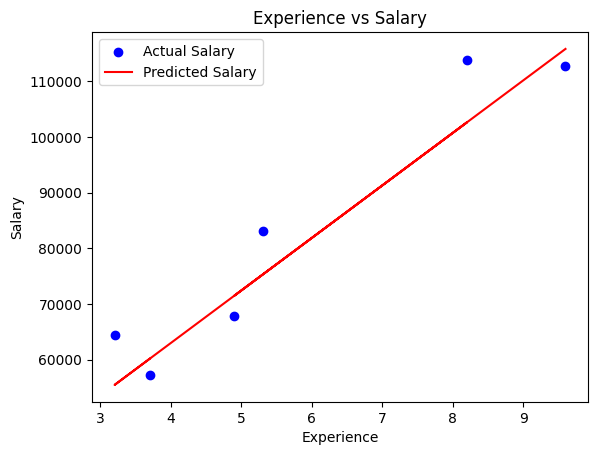

Invalid input. Please enter 1 or 0.
Invalid input. Please enter 1 or 0.
Invalid input. Please enter 1 or 0.
Invalid input. Please enter 1 or 0.
Invalid input. Please enter 1 or 0.
Predicted Salary for 2.0 years of experience: $44169.21


In [ ]:
while True:
    user_input = input('Press 1 to predict Salary, press 0 to show plot: ')

    try:
        user_input = int(user_input)
    except ValueError:
        print("Invalid input. Please enter 1 or 0.")
        continue

    if user_input == 1:
        experience = input('Enter years of experience: ')
        try:
            experience = float(experience)
        except ValueError:
            print("Invalid input for experience. Please enter a valid number.")
            continue

        input_data = pd.DataFrame([[experience]], columns=['YearsExperience'])
        predicted_salary = model.predict(input_data)
        print(f'Predicted Salary for {experience} years of experience: ${predicted_salary[0]:.2f}')

    elif user_input == 0:
        plt.scatter(X_test['YearsExperience'], y_test, color = 'blue', label = 'Actual Salary')
        plt.plot(X_test['YearsExperience'], y_pred, color = 'red', label = 'Predicted Salary')
        plt.legend(loc = 'best')
        plt.xlabel('Experience')
        plt.ylabel('Salary')
        plt.title('Experience vs Salary')
        plt.show()
        break

    else:
        print('Invalid input. Please enter 1 or 0.')

In [2]:
%pip install streamlit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\mrg18\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Fetch stock data
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')
    df = df[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    return df

# Load dataset
ticker = 'AAPL'  # Example stock symbol
df = get_stock_data(ticker)

# Moving averages
df['7_day_avg'] = df['Close'].rolling(window=7).mean()
df['30_day_avg'] = df['Close'].rolling(window=30).mean()

# Drop NaN values due to above
df.dropna(inplace=True)

# Define features and target variable
X = df[['Day', 'Volume', '7_day_avg', '30_day_avg']]
y = df['Close']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Train model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

MSE: 11.178820539203022
R-squared: 0.992869510166562
Adjusted R-squared: 0.9927511617875838


2025-03-21 03:59:54.995 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


MSE: 258.34, R-squared: 0.83, Adjusted R-squared: 0.83


2025-03-21 03:59:56.242 
  command:

    streamlit run C:\Users\mrg18\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-21 03:59:56.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 03:59:56.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 03:59:56.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 03:59:56.246 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 03:59:56.247 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 03:59:56.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 03:59

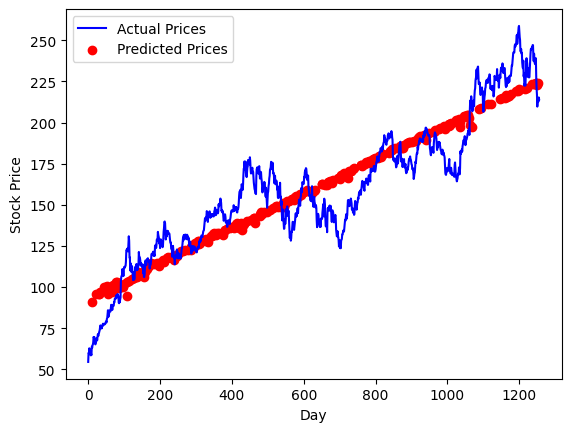

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st

# Fetch stock data
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')
    df = df[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    return df

# Load dataset
ticker = 'AAPL'  # Example stock symbol
df = get_stock_data(ticker)

# Define features and target variable
X = df[['Day', 'Volume']]
y = df['Close']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Compute Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f'MSE: {mse:.2f}, R-squared: {r2:.2f}, Adjusted R-squared: {adj_r2:.2f}')

# Streamlit app for visualization
st.title('Stock Price Trend Prediction')
st.write(f'Stock: {ticker}')

fig, ax = plt.subplots()
ax.plot(df['Day'], df['Close'], label='Actual Prices', color='blue')
ax.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red')
ax.set_xlabel('Day')
ax.set_ylabel('Stock Price')
ax.legend()
st.pyplot(fig)

# Prediction function
def predict_stock_price(day, volume):
    input_data = np.array([day, volume]).reshape(1, -1)
    return model.predict(input_data)[0]

# User input for prediction
st.sidebar.header('Predict Future Stock Price')

day = st.sidebar.number_input('Enter Future Day:',
                              min_value=int(df['Day'].min()), 
                              max_value=int(df['Day'].max()) + 30)

volume = st.sidebar.number_input('Enter Expected Volume:',
                                 min_value=int(df['Volume'].min()), 
                                 max_value=int(df['Volume'].max()))

if st.sidebar.button('Predict'):
    prediction = predict_stock_price(day, volume)
    st.sidebar.write(f'Predicted Stock Price: ${prediction:.2f}')


In [5]:
!streamlit run test.py

^C
